In [ ]:
pip install --upgrade openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.3-py3-none-any.whl size=67489 sha256=2cbb0e3378b01df62ee7736a1f2b09ac97d9b7e9d9857e9f63ac72e0a332bed6
  Stored in directory: /root/.cache/pip/wheels/fa/6b/ac/76fa8f79ea603d4bd896c0d185e970a7dbfab23df6bb14c351
Successfully built openai


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import configparser

config = configparser.ConfigParser()
config.read('/content/drive/MyDrive/openapi.txt')
secret_key = config['global']['OPENAI_API_KEY']

In [ ]:
!curl https://api.openai.com/v1/images/generations \
  -H 'Content-Type: application/json' \
  -H 'Authorization: Bearer YOUR_API_KEY' \
  -d '{
  "prompt": "A cute baby sea otter",
  "n": 2,
  "size": "1024x1024"
}'

SyntaxError: ignored

In [ ]:
import openai
import time
openai.api_key = secret_key
completion = openai.Completion.create(engine="davinci", prompt="This hotel was terrible")
print(completion.choices[0]['text'])

completion = openai.Completion.create(engine="davinci", prompt="This hotel was great")
print(completion.choices[0]['text'])


!!! No less...terrible. The fact that they have associated their website with
. I wish more of the rooms had mini fridges so you can purchase cans


In [ ]:
import numpy as np

good_reviews = []
bad_reviews = []
for i in range(0,500):
  completion = openai.Completion.create(engine="davinci", prompt="This hotel was great")
  good_reviews.append(completion.choices[0]['text'])
  print('Generating good review number %i'%(i))
  completion = openai.Completion.create(engine="davinci", prompt="This hotel was terrible") 
  bad_reviews.append(completion.choices[0]['text'])
  print('Generating bad review number %i'%(i))
  display = np.random.choice([0,1],p=[0.7,0.3])
  time.sleep(3)
  if display ==1:
    display_good = np.random.choice([0,1],p=[0.5,0.5])
  if display_good ==1:
    print('Printing random good review')
    print(good_reviews[-1])
  if display_good ==0:
    print('Printing random bad review')
    print(bad_reviews[-1])

Generating good review number 0
Generating bad review number 0
Printing random bad review
. I would definitely NOT reccomend staying here if you are remotely looking
Generating good review number 1
Generating bad review number 1
Printing random bad review
 for me, but because of its location to several places I had to visit,
Generating good review number 2
Generating bad review number 2
Printing random bad review
 by Angie B on 21 Jul 2016 (Couple Traveller) The hall
Generating good review number 3
Generating bad review number 3
Printing random bad review
! The room we stayed in smelled terrible, like someone had died in there!
Generating good review number 4
Generating bad review number 4
Printing random bad review
 definitely not worth the price they charge on the site.

"Clean rooms
Generating good review number 5
Generating bad review number 5
Printing random bad review
 and I would definitely never stay there again, not only because of their terrible breakfast
Generating good revi

RateLimitError: ignored

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.zeros((321,2)))
df.columns = ['Reviews','Sentiment']
df['Sentiment'].loc[0:320] = 1

In [ ]:
df

,Reviews,Sentiment
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
315,0.0,1.0
316,0.0,1.0
317,0.0,1.0
318,0.0,1.0


In [ ]:
len(good_reviews+bad_reviews)

321

In [ ]:
df['Reviews'] = good_reviews+bad_reviews

In [ ]:
df.to_csv('generated_reviews.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
labeled_data = pd.read_csv('generated_reviews.csv').drop(columns=['Unnamed: 0'])
labeled_data.Sentiment = labeled_data.Sentiment.astype(int)
labeled_data = labeled_data.dropna().reset_index()

In [ ]:
!pip install transformers

In [ ]:
dataset = labeled_data
from transformers import AutoTokenizer
#tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
#tokenized_data = tokenizer(dataset["Reviews"].values.tolist(), return_tensors="np
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
tokenized_data = vectorizer.fit_transform(dataset['Reviews']).toarray()
labels = np.array(dataset["Sentiment"]) # Label is already an array of 0 and 1

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
X = tokenized_data
y = labels
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

rf.fit(X_train,y_train)



RandomForestClassifier()

(256, 94)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


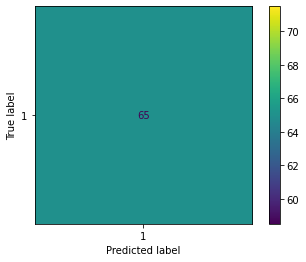

In [ ]:
plot_confusion_matrix(rf,X_test,y_test)